# DATA ANALYSIS FOR BOSTON HOUSING DATASET

In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000
- PTRATIO - pupil-teacher ratio by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in 1000's

# Generate Descriptive Statistics and Visualizations

#### 1. For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Median value of owner-occupied homes')

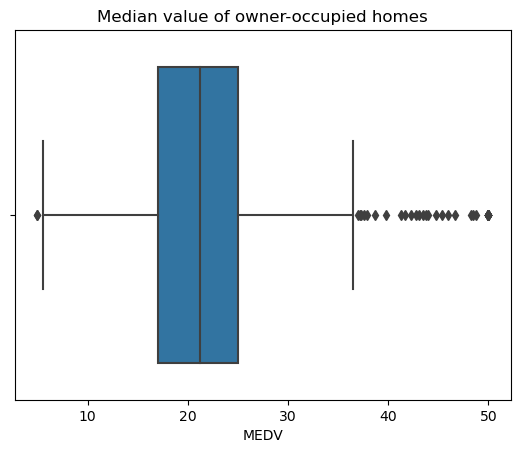

In [4]:
sns.boxplot(x=boston_df['MEDV'])
plt.title('Median value of owner-occupied homes')

#### 2. Provide a  bar plot for the Charles river variable

Text(0.5, 1.0, 'Bar Plot for Charles River Variable')

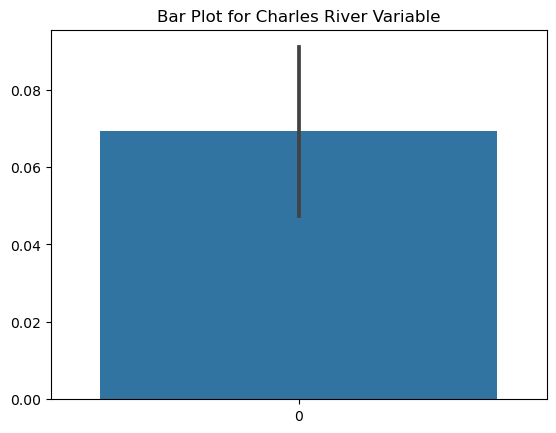

In [5]:
sns.barplot(data = boston_df['CHAS'])
plt.title('Bar Plot for Charles River Variable')

#### 3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [6]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'

Text(0.5, 1.0, 'Median value of owner-occupied homes per Age Group')

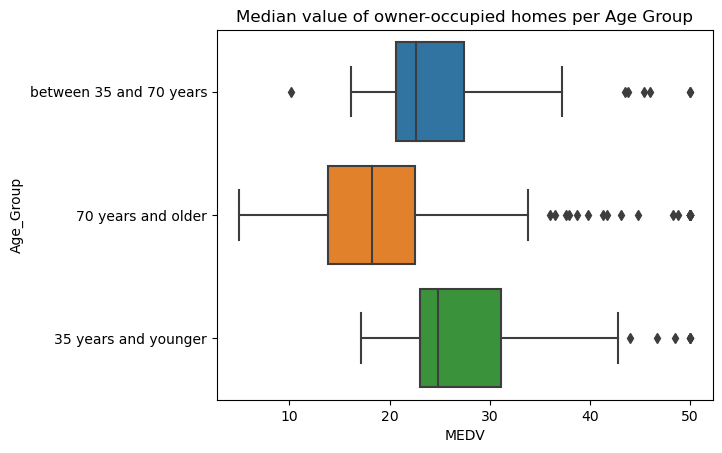

In [7]:
sns.boxplot(x = 'MEDV', y = 'Age_Group', data = boston_df)
plt.title('Median value of owner-occupied homes per Age Group')

#### 4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Nitric oxide concentrations and the proportion of non-retail business acres per town')

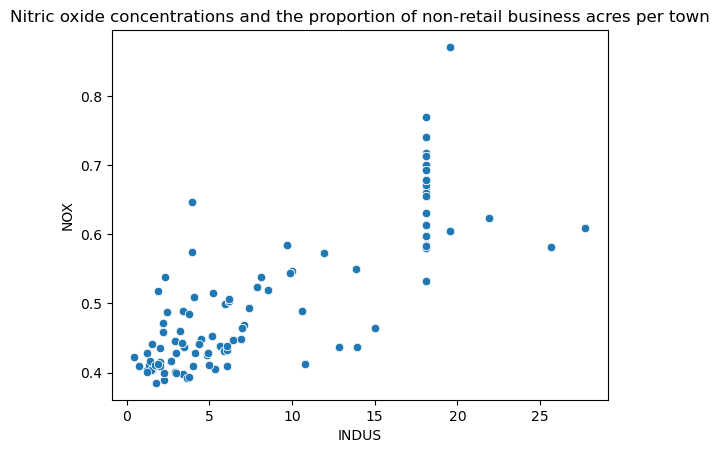

In [8]:
sns.scatterplot(x='INDUS', y='NOX', data = boston_df)
plt.title('Nitric oxide concentrations and the proportion of non-retail business acres per town')

#### 5. Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Pupil to teacher ratio per town')

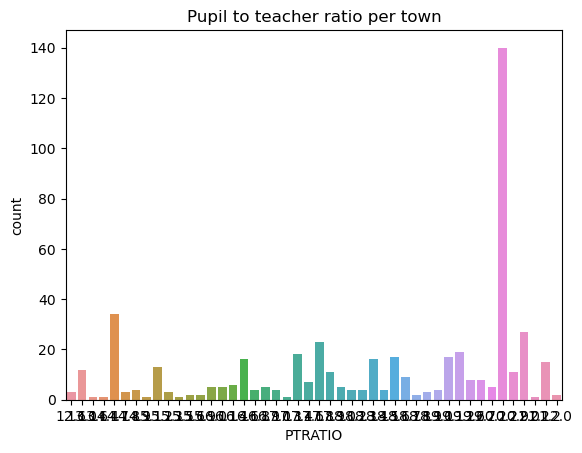

In [9]:
sns.countplot(x = 'PTRATIO', data = boston_df)
plt.title('Pupil to teacher ratio per town')

# Test Statistics

#### 6. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [10]:
# Performing Hypothesis testing
# H0: There is no significant difference in median values between houses bounded by the Charles river or not
# Ha: There is significant difference in median values between houses bounded by the Charles river or not

In [11]:
chas_far = boston_df[boston_df['CHAS']==0]['MEDV']
chas_near = boston_df[boston_df['CHAS']==1]['MEDV']

In [12]:
#Test of variance : Levene
#Ho : Population variances equal
#Ha: Population variances different
st.levene(chas_far,chas_near)

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

In [13]:
# pvalue < alpha(0.05) : reject Ho. Population variances different

In [14]:
st.ttest_ind(chas_far,chas_near,equal_var=False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

In [15]:
# Since the p-value < alpha(0.05), we reject H0, meaning there is significant difference in median value between houses near the Charles River and houses far away

#### 7. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [16]:
#H0: There is no significant difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940
#Ha: There is significant difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

In [17]:
# As we have two continuous variables Age & MEDV we will be using Regression for Anova
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


In [18]:
# Since the p-value < alpha(0.05), we reject H0, meaning there is significant difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

#### 8. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [19]:
#H0: There is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town
#Ha: There is correlation Nitric oxide concentrations and proportion of non-retail business acres per town

In [20]:
st.pearsonr(boston_df.NOX,boston_df.INDUS)

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

In [21]:
# Since the p-value < alpha(0.05), we reject H0, meaning there is correlation Nitric oxide concentrations and proportion of non-retail business acres per town

#### 9. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [22]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
prediction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        20:07:03   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# In conclusion there is an increase in coef by 1.0916 additional weighted distance to the five Boston employment centres on the median value of owner occupied homes